In [3]:
import pandas as pd
import numpy as np

In [17]:
# p = pd.read_table("raw_data/sc16/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')
p = pd.read_table("raw_data/new_sc1/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')

In [5]:
p[p['AgentID'] == 24828]

,AgentID,ActivityID,TimeIn,TimeOut,xLoc,yLoc,zLoc,TotalDelayTime,TotalDistance


In [6]:
p[p['ActivityID'] == 62]

,AgentID,ActivityID,TimeIn,TimeOut,xLoc,yLoc,zLoc,TotalDelayTime,TotalDistance


In [18]:
orign_tab = p.copy()
# print(len(orign_tab))
for id in [59, 62, 63, 64]:
    orign_tab = orign_tab.drop(index=orign_tab[orign_tab.ActivityID==id].index) # drop waiting activity

# print(len(orign_tab))
shift_tab = orign_tab.sort_values(by="TimeIn", ascending=True).groupby(by="AgentID")[["TimeIn", "ActivityID"]].shift(-1)
orign_tab["NextTimeIn"] = shift_tab["TimeIn"]
orign_tab["NextActivity"] = shift_tab["ActivityID"]
orign_tab = orign_tab.dropna(subset=["NextActivity"])

orign_tab["OD"] = orign_tab.apply(lambda row: "|".join([str(row.ActivityID), str(row.NextActivity)]), axis=1)

In [19]:
OD_Series = orign_tab.groupby("OD").size()
OD_Series

OD
1.0|1.0       344
1.0|2.0       187
1.0|51.0       49
1.0|52.0      130
1.0|53.0      186
1.0|54.0      166
1.0|55.0      105
1.0|56.0      169
1.0|57.0      212
1.0|58.0       32
2.0|1.0       297
2.0|2.0      3290
2.0|51.0       56
2.0|52.0      167
2.0|53.0      320
2.0|54.0      301
2.0|55.0      482
2.0|56.0      455
2.0|57.0      288
2.0|58.0       64
51.0|1.0      148
51.0|10.0      36
51.0|11.0      31
51.0|12.0      34
51.0|13.0      45
51.0|14.0      45
51.0|15.0      55
51.0|2.0      383
51.0|8.0       44
51.0|9.0       44
52.0|1.0       94
52.0|10.0      30
52.0|11.0      32
52.0|12.0      29
52.0|13.0      36
52.0|14.0      27
52.0|15.0      35
52.0|2.0      261
52.0|8.0       36
52.0|9.0       24
58.0|1.0      141
58.0|10.0      43
58.0|11.0      44
58.0|12.0      57
58.0|13.0      30
58.0|14.0      41
58.0|15.0      42
58.0|2.0      362
58.0|8.0       59
58.0|9.0       45
dtype: int64

In [20]:
# od = [1, 2, 8, 9, 10, 11, 12, 13, 14, 15] #entry exit
od = [1, 2, 51, 52, 53, 54, 55, 56, 57, 58] #

od_mat = np.zeros([len(od), len(od)])
for ind in OD_Series.index:
    o = int(float(ind.split('|')[0]))
    d = int(float(ind.split('|')[1]))
    if o in od and d in od:
        od_mat[od.index(o), od.index(d)] += OD_Series[ind]
        

In [21]:
OD_Series.index

Index(['1.0|1.0', '1.0|2.0', '1.0|51.0', '1.0|52.0', '1.0|53.0', '1.0|54.0',
       '1.0|55.0', '1.0|56.0', '1.0|57.0', '1.0|58.0', '2.0|1.0', '2.0|2.0',
       '2.0|51.0', '2.0|52.0', '2.0|53.0', '2.0|54.0', '2.0|55.0', '2.0|56.0',
       '2.0|57.0', '2.0|58.0', '51.0|1.0', '51.0|10.0', '51.0|11.0',
       '51.0|12.0', '51.0|13.0', '51.0|14.0', '51.0|15.0', '51.0|2.0',
       '51.0|8.0', '51.0|9.0', '52.0|1.0', '52.0|10.0', '52.0|11.0',
       '52.0|12.0', '52.0|13.0', '52.0|14.0', '52.0|15.0', '52.0|2.0',
       '52.0|8.0', '52.0|9.0', '58.0|1.0', '58.0|10.0', '58.0|11.0',
       '58.0|12.0', '58.0|13.0', '58.0|14.0', '58.0|15.0', '58.0|2.0',
       '58.0|8.0', '58.0|9.0'],
      dtype='object', name='OD')

<AxesSubplot:>

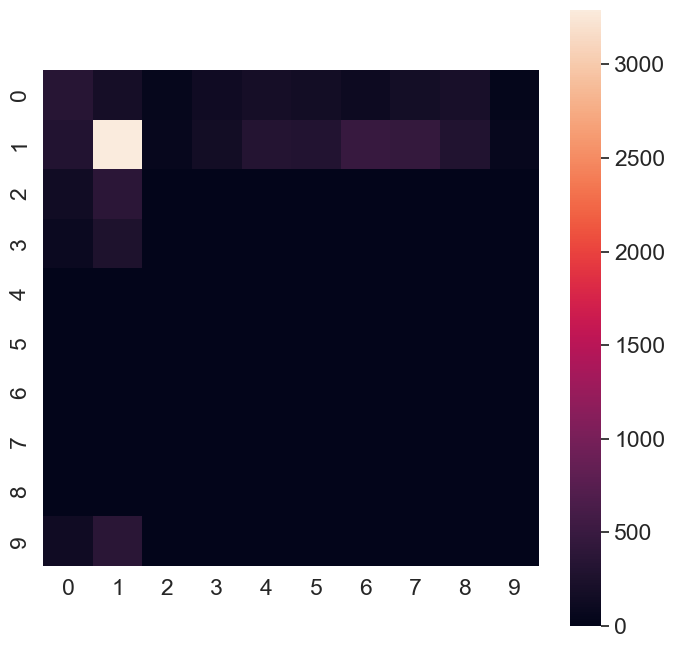

In [22]:
import seaborn as sns
from sklearn import preprocessing   
 
import numpy as np  
min_max_scaler = preprocessing.MinMaxScaler()  
%matplotlib inline
# data = (od_mat - od_mat.min(axis=0))/(od_mat.max(axis=0) - od_mat.min(axis=0))
# data = pd.DataFrame(data)
data = od_mat
sns.set(font_scale=1.5)
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=data,square=True)

In [23]:
data

array([[ 344.,  187.,   49.,  130.,  186.,  166.,  105.,  169.,  212.,
          32.],
       [ 297., 3290.,   56.,  167.,  320.,  301.,  482.,  455.,  288.,
          64.],
       [ 148.,  383.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [  94.,  261.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [ 141.,  362.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]])

In [37]:
A = np.array([[0, 1, 9, 9, 9, 9, 9, 9, 9, 9],
[1, 0, 21, 21, 21, 21, 21, 21, 21, 21],
[2, 2, 0, 1, 1, 1, 0,1, 1, 1],
[2, 2, 1, 0, 1, 1, 1,0, 1, 1],
[2, 2, 1,1,0, 1, 1, 1,0, 1],
[2, 2, 1, 1,1, 0, 1, 1,1, 0],
[2, 2, 0, 1,1, 1, 0, 1,1, 1],
[2, 2, 1, 0,1, 1, 1, 0,1, 1],
[2, 2, 1, 1,0, 1, 1, 1,0, 1],
[2, 2, 1, 1,1, 0, 1, 1,1, 0]])

B = np.array([[0, 1, 9, 9, 9, 3, 5, 3, 5, 9],
[1, 0, 10, 21, 10, 10, 21, 2, 1, 2],
[5, 2, 0, 1, 1, 1, 0, 1, 1, 1],
[2, 2, 1, 0, 1, 1, 1, 0, 1, 1],
[7, 2, 1, 1, 0, 1, 1, 5, 0, 1],
[2, 2, 1, 1, 1, 0, 1, 1, 1, 0],
[10, 2, 0, 1, 1, 1, 0, 1, 3, 1],
[2, 2, 1, 0, 1, 1, 1, 0, 1, 1],
[2, 1, 1, 1, 0, 1, 1, 1, 0, 1],
[2, 2, 1, 1, 1, 0, 1, 1, 1, 0]])

C = np.array([[0, 1, 9, 20, 9, 10, 5, 15, 5, 9],   #sc3
[10, 0, 10, 21, 10, 10, 21, 2, 1, 2],
[5, 2, 0, 1, 1, 1, 0, 1, 1, 1],
[2, 2, 20, 0, 1, 1, 1, 0, 1, 1],
[7, 20, 1, 1, 0, 1, 1, 5, 0, 1],
[2, 10, 1, 1, 1, 0, 1, 1, 1, 0],
[10, 2, 0, 1, 1, 1, 0, 1, 3, 1],
[2, 2, 1, 0, 1, 1, 1, 0, 1, 1],
[2, 1, 1, 1, 0, 1, 1, 1, 0, 1],
[2, 2, 5, 1, 20, 0, 1, 1, 1, 0]])



<AxesSubplot:>

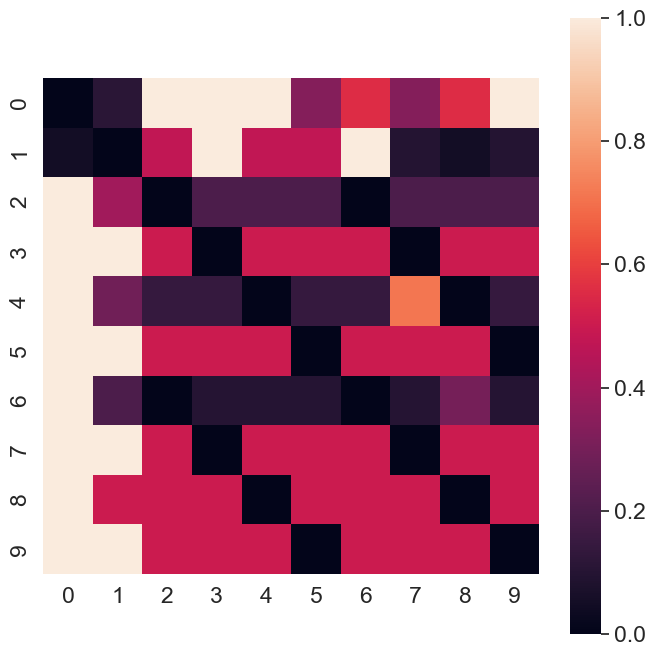

In [42]:
from sklearn import preprocessing   
 
import numpy as np  
min_max_scaler = preprocessing.MinMaxScaler()  
 
# X_minMax = min_max_scaler.fit_transform(B) 
X_minMax = B
data = (X_minMax- X_minMax.min(axis=1).reshape(-1,1))/(X_minMax.max(axis=1).reshape(-1,1) - X_minMax.min(axis=1).reshape(-1,1))
data = pd.DataFrame(data)
sns.set(font_scale=1.5)
sns.set_context({"figure.figsize":(8,8)})
sns.heatmap(data=data,square=True) 

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing   
import matplotlib.pyplot as plt

import numpy as np  
p1 = pd.read_table("raw_data/sc1/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')
p2 = pd.read_table("raw_data/sc2/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')
p3 = pd.read_table("raw_data/sc3/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')

def gen_od(df):
    shift_tab = df.sort_values(by="TimeIn", ascending=True).groupby(by="AgentID")[["TimeIn", "ActivityID"]].shift(-1)
    orign_tab = df.copy()
    orign_tab["NextTimeIn"] = shift_tab["TimeIn"]
    orign_tab["NextActivity"] = shift_tab["ActivityID"]
    orign_tab = orign_tab.dropna(subset=["NextActivity"])
    orign_tab["OD"] = orign_tab.apply(lambda row: "|".join([str(row.ActivityID), str(row.NextActivity)]), axis=1)

    OD_Series = orign_tab.groupby("OD").size()
    od = [1, 2, 8, 9, 10, 11, 12, 13, 14, 15]
    # od = [1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 28, 29, 31, 32, 34, 36, 37, 38, 39, 41, 42, 45, 46, 47, 48, 49]
    od_mat = np.zeros([len(od), len(od)])
    for ind in OD_Series.index:
        o = int(float(ind.split('|')[0]))
        d = int(float(ind.split('|')[1]))
        if o in od and d in od:
            od_mat[od.index(o), od.index(d)] += OD_Series[ind]

    # min_max_scaler = preprocessing.MinMaxScaler()  
    data = od_mat
    # data = (od_mat - od_mat.min(ax÷is=1).reshape(-1,1))/(od_mat.max(axis=1).reshape(-1,1) - od_mat.min(axis=1).reshape(-1,1))
    return data
data1 = gen_od(p1)
data2 = gen_od(p2)
data3 = gen_od(p3)

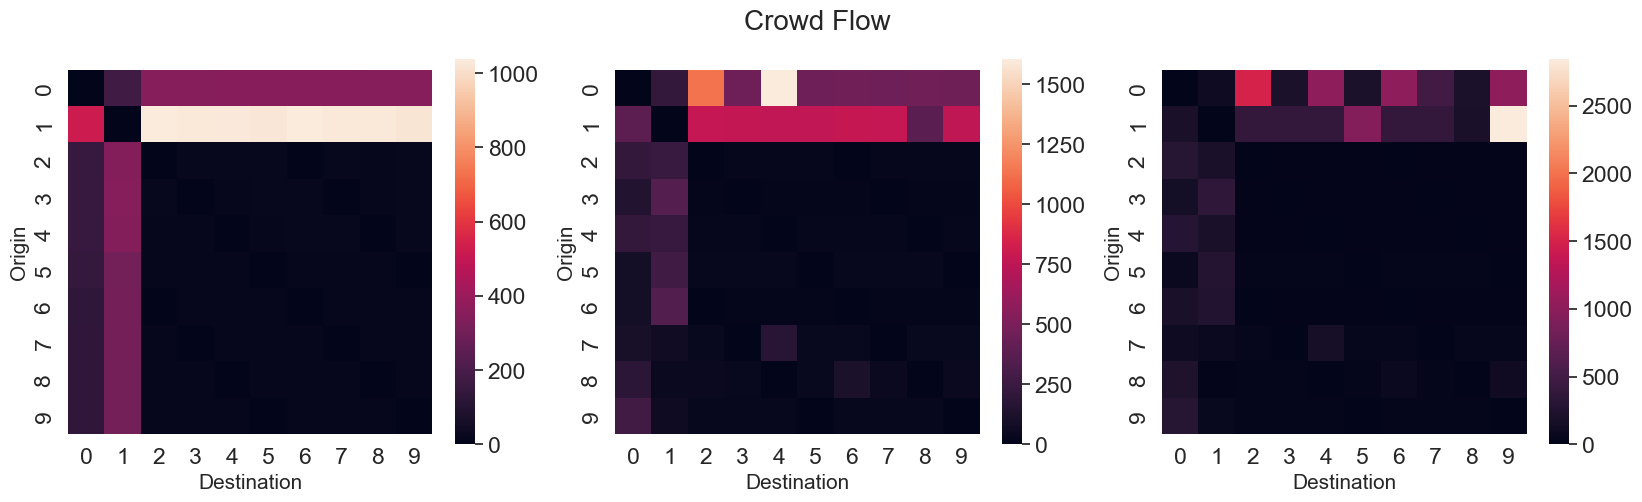

In [68]:
# p = pd.read_table("raw_data/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')

# data = pd.DataFrame(data)
# sns.set(font_scale=1.5)
sns.set_context({"figure.figsize":(20,5)})
f, (ax1, ax2, ax3) = plt.subplots(ncols=3)
sns.heatmap(data=data1,square=True, ax=ax1) 
sns.heatmap(data=data2,square=True, ax=ax2) 
sns.heatmap(data=data3,square=True, ax=ax3) 
# sns.heatmap(data=data3,square=True) 
f.suptitle('Crowd Flow',fontsize = 20) # title with fontsize 20
ax1.set_xlabel('Destination', fontsize = 15) # x-axis label with fontsize 15
ax1.set_ylabel('Origin', fontsize = 15) # y-axis label with fontsize 15
ax2.set_xlabel('Destination', fontsize = 15) # x-axis label with fontsize 15
ax2.set_ylabel('Origin', fontsize = 15) # y-axis label with fontsize 15
ax3.set_xlabel('Destination', fontsize = 15) # x-axis label with fontsize 15
ax3.set_ylabel('Origin', fontsize = 15) # y-axis label with fontsize 15

plt.show()
fig = f.get_figure()
fig.savefig("./fig/od_mat_notnor.pdf")

In [32]:
a = np.array([[1,2,3],[3,4,5]])
(a - a.min(axis=1).reshape(-1,1))/(a.max(axis=1).reshape(-1,1)-a.min(axis=1).reshape(-1,1))

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [27]:
a - a.min(axis=1)

array([[ 0, -1],
       [ 2,  1]])

In [8]:
orign_tab[orign_tab.ActivityID == 48]

NameError: name 'orign_tab' is not defined

In [23]:
activity = pd.read_table("raw_data/new_sc1/Rep1/ActivityLocations.log", sep=';', header=0).dropna(axis=1, how='all')
activity.sort_values(by="ID")

,ID,ActivityName,ActivityGroup,ActivityType,ActivityTypeName,LayerID
21,1,Entry_exit_back,station_entry_exit,6001,Entry_Exit,1
9,2,Entry_exit_main,station_entry_exit,6001,Entry_Exit,1
11,8,Entry_exit_pl_1,platform_entry_exit_1,6001,Entry_Exit,2
13,9,Entry_exit_pl_3,platform_entry_exit_3,6001,Entry_Exit,2
30,10,Entry_exit_pl_5,platform_entry_exit_5,6001,Entry_Exit,2
37,11,Entry_exit_pl_7,platform_entry_exit_7,6001,Entry_Exit,2
36,12,Entry_exit_pl_2,platform_entry_exit_2,6001,Entry_Exit,2
22,13,Entry_exit_pl_4,platform_entry_exit_4,6001,Entry_Exit,2
35,14,Entry_exit_pl_6,platform_entry_exit_6,6001,Entry_Exit,2
6,15,Entry_exit_pl_8,platform_entry_exit_8,6001,Entry_Exit,2


In [9]:
import skmob

In [64]:
p = pd.read_table("raw_data/sc1/Rep1/AgentActivities.log", sep=';', header=0).dropna(axis=1, how='all')

In [2]:
import matplotlib.pyplot as plt


In [82]:
x = p[(p["zLoc"]==0)]["xLoc"].values
y = p[(p["zLoc"]==0)]["yLoc"].values

In [95]:
x2 = p[(p["zLoc"]==0) & (p["ActivityID"]==31)]["xLoc"].values
y2 = p[(p["zLoc"]==0) & (p["ActivityID"]==31)]["yLoc"].values
x1 = p[(p["zLoc"]==0) & (p["ActivityID"]==42)]["xLoc"].values
y1 = p[(p["zLoc"]==0) & (p["ActivityID"]==42)]["yLoc"].values
x3 = p[(p["zLoc"]==0) & (p["ActivityID"]==38)]["xLoc"].values
y3 = p[(p["zLoc"]==0) & (p["ActivityID"]==38)]["yLoc"].values

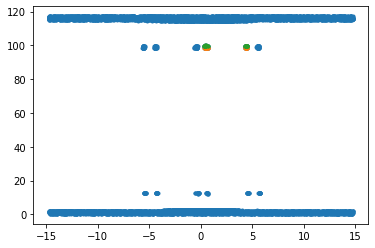

In [97]:
plt.plot(x, y, '.')
# plt.plot(x1, y1, '.')
plt.plot(x2, y2, '.')
plt.plot(x3, y3, '.')
plt.show()